# Association Rules: Apriori and Eclat

__Prepare rules for all data sets (books, groceries, my_movies)__
- Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
- Change the minimum length in apriori algorithm
- Visualize the obtained rules using different plots

Association rules helps us to understand which things comes in combination of 2,3,4 and so on. It answers the question People who bought/watch/read also bought/watch/read...

By understanding the data we can come up with some association rules (strong and weak) that can be used in business decision making. 

Rule of Association example: if Milk(antecedent) then bread(consequent),basically Probabistic if-then statements for n number of items. Create all such possible rules for n items and select those that are most likely to indicate true dependence. 
Support calculates frequency of particular transaction/association rule/combination. There can be large number of combinations, but very few combinations are translated to actual transaction. So of all combinations we need to eliminate impossible combinations. This is done using apriori algorithm. Zero support means the transaction never happened and the rule can be discarded to save time. We can set our own threshold value for support, retaining rules corresponding to possible transactions which has actually taken place. High value of support required.

Now if particular rule have high frequency doesnt mean they are truely dependent. Say banana and detergent are seen together (suggested by support). To understand if there exist real dependence we use confidence (Number of milk and bread together/number of milk). Now this will be different than (Number of milk and bread together/number of bread). Here since numerator is same, when support is high then confidence is high. So another parameter Lift is used, when lift >1 i.e numerator > denominator means combination is sold more than individual product and when <1 combination is sold less than individual product.

To come up with such association rules we look at three parameters using Apriori algorithm:
- **Support:** Number of customers who bought A/Total number of customers * 100
- **Confidence:** Number of customers who bought A and B both/ Number of Customers who bought A
- **Lift:** Confidence/Support (suggestive of improvement) 

Support is an indication of how frequently the itemset appears in the dataset.
Confidence is an indication of how often the rule has been found to be true.

Apriori steps:
Set min support and confidence --> Take all subsets in transaction having support higher than min support -->Take all rules of these subsets having confidence higher than minimum confidence -->Sort rules by decreasing lift (Rule with highest lift given the criteria in step 1 will be the strongest)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# conda install -c conda-forge mlxtend

In [3]:
from mlxtend.frequent_patterns import apriori,association_rules

In [70]:
df = pd.read_csv('book.csv')
df.head()

# The dataset is already transaction encoded
# Let's proceed with apriori algorithm to find strong combinations

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [71]:
df.shape

(2000, 11)

In [101]:
frequent_books = apriori(df,min_support=0.15,use_colnames=True, max_len=3).sort_values(by='support',ascending=False,ignore_index=True)
frequent_books

,support,itemsets
0,0.4310,(CookBks)
1,0.4230,(ChildBks)
2,0.2820,(DoItYBks)
3,0.2760,(GeogBks)
4,0.2560,"(ChildBks, CookBks)"
5,0.2475,(YouthBks)
6,0.2410,(ArtBks)
7,0.2145,(RefBks)
8,0.1950,"(GeogBks, ChildBks)"
9,0.1925,"(GeogBks, CookBks)"


In [92]:
# Let's define a function to remove redundant rules/similar combinations:
def remove_redundants(rules):
    index=[]
    for i in range(0,len(rules)):
        if i != (len(rules)-1):
            if rules['antecedents'][i] == rules['consequents'][i+1]:
                if rules['consequents'][i] == rules['antecedents'][i+1]:
                    index.append(i)
    rules.drop(index=index,inplace=True)
    rules.reset_index(inplace=True)
    rules.drop(columns='index',inplace=True)
    return rules

In [102]:
rules = association_rules(frequent_books, metric='lift', min_threshold=1).sort_values(by='lift',ascending=False,ignore_index=True)
rules = remove_redundants(rules)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
1,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
2,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
3,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
4,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
5,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
6,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
7,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
8,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
9,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678


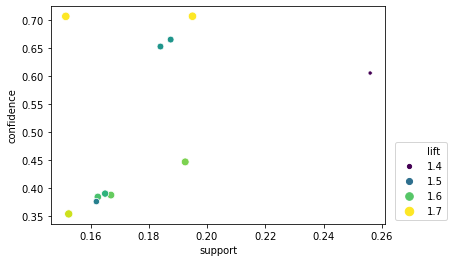

In [141]:
# Visualisation

sns.scatterplot(data=rules,x='support',y='confidence',size='lift',hue='lift',palette='viridis')
plt.legend(bbox_to_anchor=(1.2,0.4));

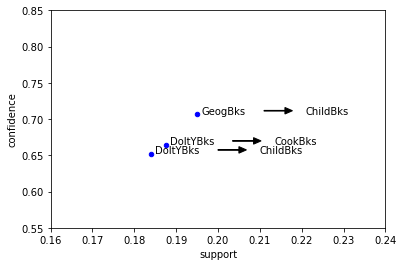

In [196]:
plt.xlim(0.16,0.24)
plt.ylim(0.55,0.85)
plt.xlabel('support')
plt.ylabel('confidence')
for i in [0,7,8]:
    plt.scatter(rules['support'][i],rules['confidence'][i],color='blue',s=20)
    plt.annotate(list(rules['antecedents'][i])[0],(rules['support'][i]-.02+0.021,rules['confidence'][i]))
    plt.annotate(list(rules['consequents'][i])[0],(rules['support'][i]+.005+0.021,rules['confidence'][i]))
    plt.arrow(x=rules['support'][i]-0.005+0.021,y=rules['confidence'][i]+0.005,dx=0.005,dy=0,color='k',width=0.0009,head_width=10*0.0009,head_length=2*0.0009);

In [197]:
frequent_books = apriori(df,min_support=0.10,use_colnames=True, max_len=3).sort_values(by='support',ascending=False,ignore_index=True)
frequent_books

,support,itemsets
0,0.4310,(CookBks)
1,0.4230,(ChildBks)
2,0.2820,(DoItYBks)
3,0.2760,(GeogBks)
4,0.2560,"(ChildBks, CookBks)"
5,0.2475,(YouthBks)
6,0.2410,(ArtBks)
7,0.2145,(RefBks)
8,0.1950,"(GeogBks, ChildBks)"
9,0.1925,"(GeogBks, CookBks)"


In [198]:
rules = association_rules(frequent_books, metric='confidence', min_threshold=0).sort_values(by='lift',ascending=False)
rules = remove_redundants(rules)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
2,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
3,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
4,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
...,...,...,...,...,...,...,...,...,...
65,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
66,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
67,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
68,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678


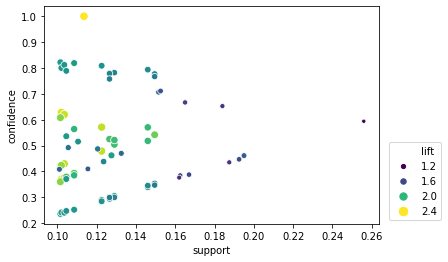

In [199]:
# Visualisation

sns.scatterplot(data=rules,x='support',y='confidence',size='lift',hue='lift',palette='viridis')
plt.legend(bbox_to_anchor=(1.2,0.4));

### my_movies Dataset

In [20]:
df1 = pd.read_csv('my_movies.csv')
df1.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [21]:
df1 = df1.drop(columns=df1.iloc[:,0:5].columns.tolist())
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [22]:
df1.shape

(10, 10)

In [201]:
frequent_movies = apriori(df1,min_support=0.4,use_colnames=True, max_len=3).sort_values(by='support',ascending=False,ignore_index=True)
frequent_movies

,support,itemsets
0,0.7,(Gladiator)
1,0.6,(Sixth Sense)
2,0.6,(Patriot)
3,0.6,"(Patriot, Gladiator)"
4,0.5,"(Sixth Sense, Gladiator)"
5,0.4,"(Sixth Sense, Patriot)"
6,0.4,"(Sixth Sense, Gladiator, Patriot)"


In [203]:
rules = association_rules(frequent_movies, metric='lift', min_threshold=1).sort_values(by='lift',ascending=False,ignore_index=True)
rules = remove_redundants(rules)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
2,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


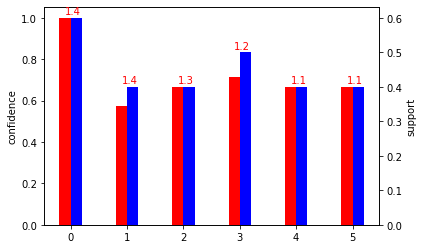

In [275]:
ax = plt.subplot(111)

ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_ylabel('support')
ax.set_ylabel('confidence')

ax.bar(rules.index-0.1, rules['confidence'], width=0.2, color='r', align='center')
ax2.bar(rules.index+0.1, rules['support'], width=0.2, color='b', align='center')
for i in rules.index.to_list():
    plt.annotate(round(rules['lift'][i],1),(rules.index[i]-0.1,rules['support'][i]+0.01),color='red')

### Groceries dataset

In [31]:
df2 = pd.read_csv('groceries.csv',error_bad_lines=False,header=None)

b'Skipping line 6: expected 4 fields, saw 5\nSkipping line 8: expected 4 fields, saw 5\nSkipping line 11: expected 4 fields, saw 5\nSkipping line 12: expected 4 fields, saw 9\nSkipping line 24: expected 4 fields, saw 5\nSkipping line 25: expected 4 fields, saw 11\nSkipping line 30: expected 4 fields, saw 6\nSkipping line 32: expected 4 fields, saw 7\nSkipping line 33: expected 4 fields, saw 5\nSkipping line 34: expected 4 fields, saw 8\nSkipping line 41: expected 4 fields, saw 6\nSkipping line 42: expected 4 fields, saw 13\nSkipping line 45: expected 4 fields, saw 8\nSkipping line 50: expected 4 fields, saw 10\nSkipping line 54: expected 4 fields, saw 10\nSkipping line 55: expected 4 fields, saw 5\nSkipping line 58: expected 4 fields, saw 7\nSkipping line 59: expected 4 fields, saw 6\nSkipping line 61: expected 4 fields, saw 7\nSkipping line 64: expected 4 fields, saw 5\nSkipping line 70: expected 4 fields, saw 8\nSkipping line 72: expected 4 fields, saw 7\nSkipping line 73: expected 4

In [32]:
df2.head()

,0,1,2,3
0,citrus fruit,semi-finished bread,margarine,ready soups
1,tropical fruit,yogurt,coffee,NaN
2,whole milk,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads
4,other vegetables,whole milk,condensed milk,long life bakery product


In [33]:
df2 = pd.get_dummies(df2)
df2

,0_Instant food products,0_UHT-milk,0_abrasive cleaner,0_artif. sweetener,0_baby cosmetics,0_bags,0_baking powder,0_bathroom cleaner,0_beef,0_berries,...,3_sugar,3_syrup,3_toilet cleaner,3_waffles,3_whipped/sour cream,3_white bread,3_white wine,3_whole milk,3_yogurt,3_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
frequent_items = apriori(df2,min_support=0.005,use_colnames=True, max_len=3).sort_values(by='support',ascending=False,ignore_index=True)
frequent_items

,support,itemsets
0,0.085981,(0_whole milk)
1,0.051425,(0_rolls/buns)
2,0.050606,(0_canned beer)
3,0.050278,(1_rolls/buns)
4,0.047167,(0_sausage)
...,...,...
115,0.005241,(0_specialty chocolate)
116,0.005241,(2_white wine)
117,0.005077,(3_rolls/buns)
118,0.005077,(1_butter milk)


In [284]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1).sort_values(by='lift',ascending=False,ignore_index=True)
rules = remove_redundants(rules)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_pastry),(1_soda),0.019817,0.040943,0.005405,0.272727,6.661091,0.004593,1.318703
1,(0_bottled water),(1_soda),0.026531,0.040943,0.005405,0.203704,4.975259,0.004318,1.204397
2,(1_rolls/buns),(2_soda),0.050278,0.027186,0.006551,0.130293,4.792591,0.005184,1.118553
3,(0_other vegetables),(1_whole milk),0.046184,0.040616,0.008516,0.184397,4.540037,0.006640,1.176288
4,(1_rolls/buns),(0_frankfurter),0.050278,0.028824,0.005896,0.117264,4.068256,0.004447,1.100188
5,(1_rolls/buns),(0_sausage),0.050278,0.047167,0.009171,0.182410,3.867354,0.006800,1.165418
6,(0_rolls/buns),(1_soda),0.051425,0.040943,0.006223,0.121019,2.955771,0.004118,1.091101
7,(0_whole milk),(1_rolls/buns),0.085981,0.050278,0.007042,0.081905,1.629024,0.002719,1.034448


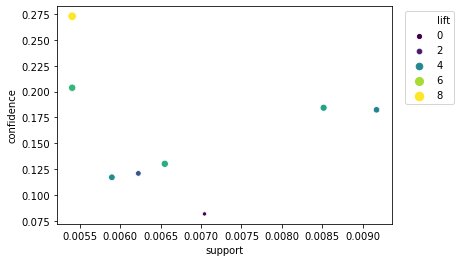

In [287]:
# Visualisation

sns.scatterplot(data=rules,x='support',y='confidence',size='lift',hue='lift',palette='viridis')
plt.legend(bbox_to_anchor=(1.2,1));

In [310]:
rules[(rules['antecedents']==frozenset({'1_rolls/buns'})) | (rules['consequents']==frozenset({'1_rolls/buns'}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(1_rolls/buns),(2_soda),0.050278,0.027186,0.006551,0.130293,4.792591,0.005184,1.118553
4,(1_rolls/buns),(0_frankfurter),0.050278,0.028824,0.005896,0.117264,4.068256,0.004447,1.100188
5,(1_rolls/buns),(0_sausage),0.050278,0.047167,0.009171,0.182410,3.867354,0.006800,1.165418
7,(0_whole milk),(1_rolls/buns),0.085981,0.050278,0.007042,0.081905,1.629024,0.002719,1.034448


In [ ]:
# We see the obvious combination of rolls/buns with sausage has strong support,confidence and fair enough lift
# Same is true for roll/buns and milk
# rolls/buns are sold together with soda and frankfurter with comparable support,confidence and lift
# Hence we can offer a combo offer on the same for marketing purpose or place them together on display etc i.e exploit 
# these combos for marketing purpose

# Thank you!